<a href="https://colab.research.google.com/github/Steffi-Wilson-Anthony/StockPricePrediction/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Stock Price Prediction

### Import libraries

In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
# initialize plotly
import plotly.io as pio
pio.renderers.default='colab'

### Import Dataset

In [3]:
df = pd.read_csv("AMZN.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,124.970001,127.250000,124.500000,125.779999,125.779999,56930100
1,2023-06-21,125.639999,126.730003,123.849998,124.830002,124.830002,52137700
2,2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600
3,2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200
4,2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300
...,...,...,...,...,...,...,...
247,2024-06-12,188.020004,188.350006,185.429993,186.889999,186.889999,33984200
248,2024-06-13,186.089996,187.669998,182.669998,183.830002,183.830002,39721500
249,2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400
250,2024-06-17,182.520004,185.000000,181.220001,184.059998,184.059998,35601900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,154.091429,155.684682,152.486588,154.169683,154.169683,4.757429e+07
std,21.433016,21.469725,21.282260,21.415796,21.415796,1.778642e+07
min,120.629997,121.639999,118.349998,119.570000,119.570000,2.237840e+07
25%,133.945004,135.512497,132.710007,134.182499,134.182499,3.694102e+07
50%,147.985001,149.430001,146.485001,148.099998,148.099998,4.407735e+07
75%,176.932495,178.744995,174.579998,176.632496,176.632496,5.360572e+07
max,189.160004,191.699997,187.440002,189.500000,189.500000,1.529387e+08


### Data visualization using plotly express - Historical performance of Tesla

In [7]:
# Line Graph, Area graph, box plot (prcie and volume)

In [8]:
px.area(df, x="Date", y="Close")

In [9]:
px.line(df, x="Date", y="Close")

In [10]:
px.area(df, x="Date", y="Volume")

In [11]:
px.bar(df, y="Volume")

In [12]:
px.box(df, y="Close")

### Data Preparation

In [13]:
# we will use date and close cols
columns = ['Date', 'Close']
new_df = pd.DataFrame(df, columns = columns)
new_df

,Date,Close
0,2023-06-20,125.779999
1,2023-06-21,124.830002
2,2023-06-22,130.149994
3,2023-06-23,129.330002
4,2023-06-26,127.330002
...,...,...
247,2024-06-12,186.889999
248,2024-06-13,183.830002
249,2024-06-14,183.660004
250,2024-06-17,184.059998


In [14]:
prophet_df = new_df.rename(columns={"Date":"ds", "Close":"y"})

In [15]:
prophet_df

,ds,y
0,2023-06-20,125.779999
1,2023-06-21,124.830002
2,2023-06-22,130.149994
3,2023-06-23,129.330002
4,2023-06-26,127.330002
...,...,...
247,2024-06-12,186.889999
248,2024-06-13,183.830002
249,2024-06-14,183.660004
250,2024-06-17,184.059998


### Facebook Prophet model

In [16]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi40ibbkc/ydojtu4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi40ibbkc/5e359yy5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48065', 'data', 'file=/tmp/tmpi40ibbkc/ydojtu4a.json', 'init=/tmp/tmpi40ibbkc/5e359yy5.json', 'output', 'file=/tmp/tmpi40ibbkc/prophet_model4vuvzuel/prophet_model-20240619084327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:43:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forcasting

In [17]:
future = m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [18]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-06-20,128.085703,123.255944,133.896232,128.085703,128.085703,0.329587,0.329587,0.329587,0.329587,0.329587,0.329587,0.0,0.0,0.0,128.415290
1,2023-06-21,128.201044,122.856224,133.576716,128.201044,128.201044,0.130376,0.130376,0.130376,0.130376,0.130376,0.130376,0.0,0.0,0.0,128.331420
2,2023-06-22,128.316385,123.151458,133.927973,128.316385,128.316385,0.080543,0.080543,0.080543,0.080543,0.080543,0.080543,0.0,0.0,0.0,128.396928
3,2023-06-23,128.431726,124.483259,134.820373,128.431726,128.431726,0.886307,0.886307,0.886307,0.886307,0.886307,0.886307,0.0,0.0,0.0,129.318032
4,2023-06-26,128.777749,124.957518,134.834249,128.777749,128.777749,1.062955,1.062955,1.062955,1.062955,1.062955,1.062955,0.0,0.0,0.0,129.840704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-07-14,185.662044,179.248568,190.036705,184.616088,186.602533,-1.244884,-1.244884,-1.244884,-1.244884,-1.244884,-1.244884,0.0,0.0,0.0,184.417160
278,2024-07-15,185.712742,180.881535,191.847151,184.609046,186.711813,1.062955,1.062955,1.062955,1.062955,1.062955,1.062955,0.0,0.0,0.0,186.775697
279,2024-07-16,185.763441,180.248157,191.727281,184.576759,186.847361,0.329587,0.329587,0.329587,0.329587,0.329587,0.329587,0.0,0.0,0.0,186.093027
280,2024-07-17,185.814139,180.590857,191.501466,184.546450,186.955885,0.130376,0.130376,0.130376,0.130376,0.130376,0.130376,0.0,0.0,0.0,185.944515


In [19]:
px.line(forcast, x="ds", y="yhat")

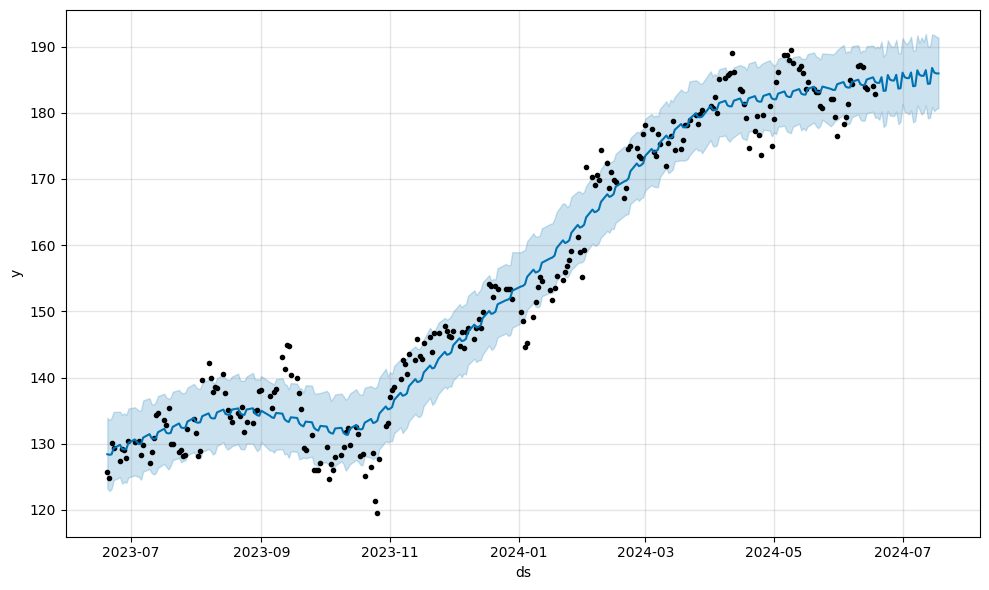

In [20]:
figure=m.plot(forcast, xlabel="ds", ylabel="y")

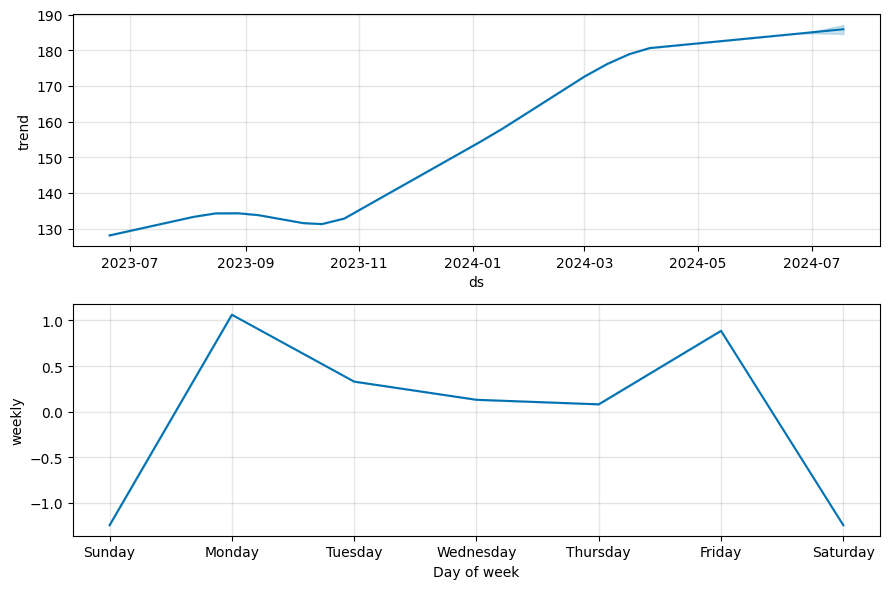

In [21]:
figure2 = m.plot_components(forcast)

### Download forcast data

In [22]:
from google.colab import files
forcast.to_csv("forcast.csv")
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>